In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_excel(r"C:\Users\funny\OneDrive\Desktop\4Course_Project_HSE\Diploma\data\data.xlsx")


In [65]:
# Вычисление длины вопросов и ответов
df["Длина вопроса"] = df["Вопрос"].apply(lambda x: len(str(x).split()))  # Количество слов
df["Длина ответа"] = df["Ответ"].apply(lambda x: len(str(x).split()))  # Количество слов

# Вычисление средней длины
mean_question_length = df["Длина вопроса"].mean()
mean_answer_length = df["Длина ответа"].mean()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\funny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


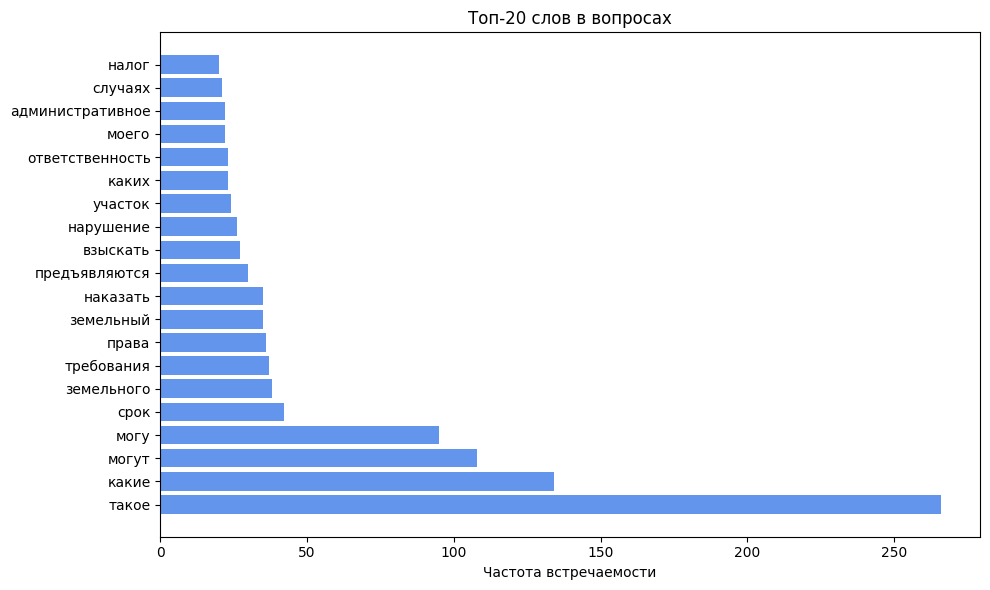

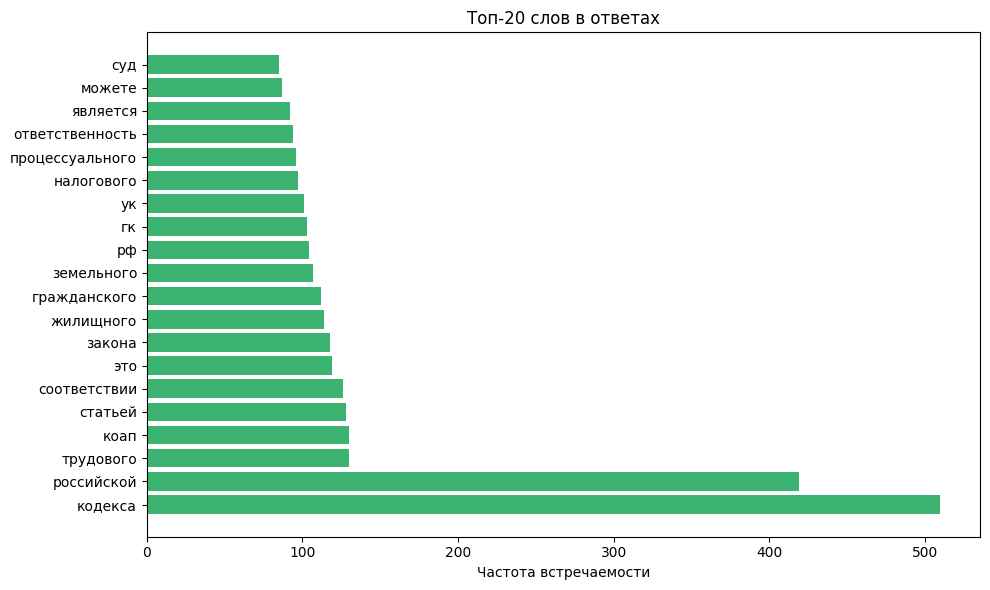

In [69]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords_ru = set(stopwords.words('russian') + ['статья', 'кодекс', 'закон'])

def plot_top_words(text_series, title, color):
    words = ' '.join(text_series).lower().split()
    words = [w for w in words if w.isalpha() and w not in stopwords_ru]
    word_counts = Counter(words).most_common(20)
    
    plt.figure(figsize=(10, 6))
    plt.barh([w[0] for w in word_counts], [w[1] for w in word_counts], color=color)
    plt.title(title)
    plt.xlabel('Частота встречаемости')
    plt.tight_layout()

plot_top_words(df['Вопрос'], 'Топ-20 слов в вопросах', 'cornflowerblue')
plot_top_words(df['Ответ'], 'Топ-20 слов в ответах', 'mediumseagreen')

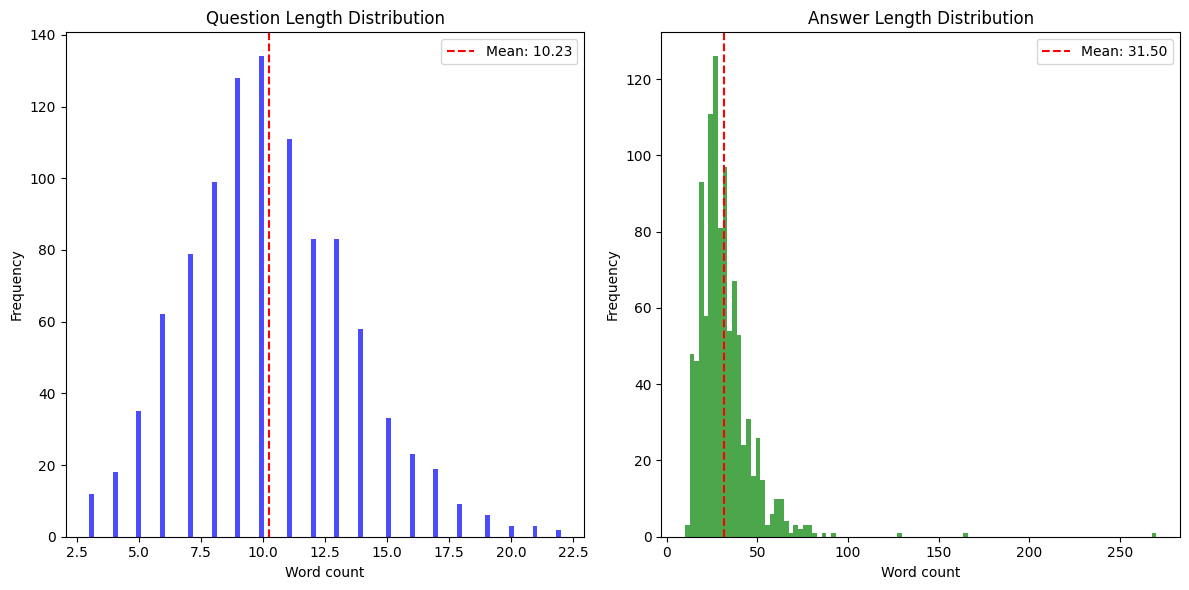

In [67]:
# Creating histograms with mean length indicators
plt.figure(figsize=(12, 6))

# Histogram for question length
plt.subplot(1, 2, 1)
plt.hist(df["Длина вопроса"], bins=100, color="blue", alpha=0.7)
plt.axvline(mean_question_length, color="red", linestyle="--", 
            label=f"Mean: {mean_question_length:.2f}")
plt.title("Question Length Distribution")
plt.xlabel("Word count")
plt.ylabel("Frequency")
plt.legend()

# Histogram for answer length
plt.subplot(1, 2, 2)
plt.hist(df["Длина ответа"], bins=100, color="green", alpha=0.7)
plt.axvline(mean_answer_length, color="red", linestyle="--", 
            label=f"Mean: {mean_answer_length:.2f}")
plt.title("Answer Length Distribution")
plt.xlabel("Word count")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

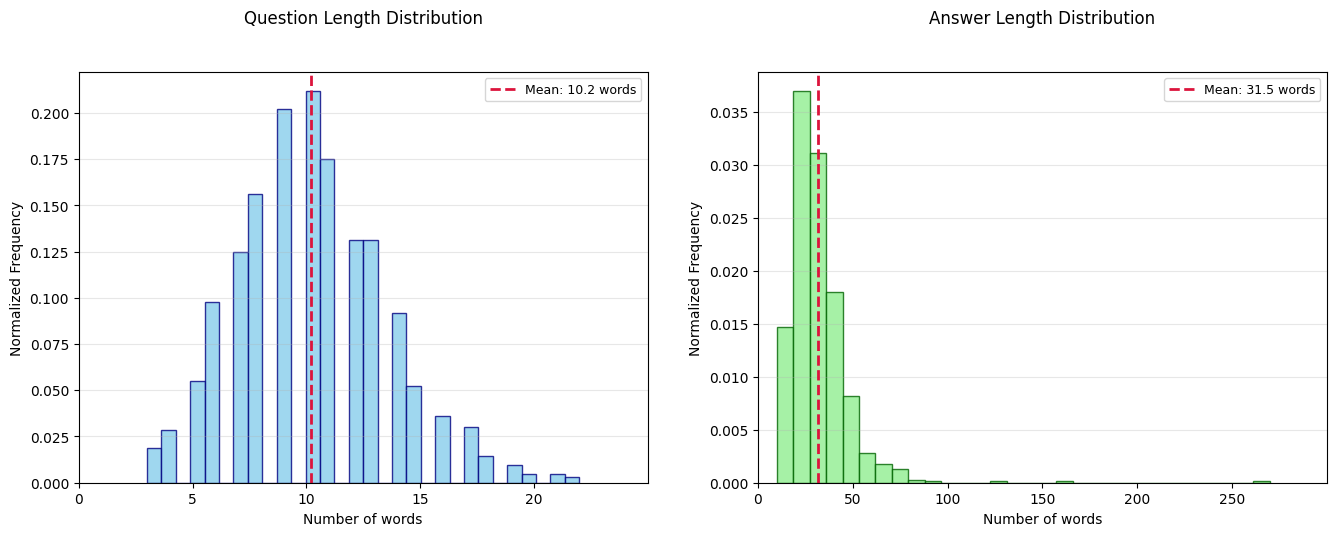

In [68]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 6))

# Question Length Histogram
plt.subplot(1, 2, 1)
n, bins, patches = plt.hist(df["Длина вопроса"], bins=30, 
                           color='skyblue', edgecolor='navy', 
                           alpha=0.8, density=True)
plt.axvline(mean_question_length, color='crimson', linewidth=2, 
           linestyle='--', label=f'Mean: {mean_question_length:.1f} words')
plt.title('Question Length Distribution\n', fontsize=12, pad=20)
plt.xlabel('Number of words', fontsize=10)
plt.ylabel('Normalized Frequency', fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.legend(fontsize=9)
plt.xticks(np.arange(0, 25, 5))
plt.xlim(0, 25)

# Answer Length Histogram
plt.subplot(1, 2, 2)
n, bins, patches = plt.hist(df["Длина ответа"], bins=30, 
                          color='lightgreen', edgecolor='darkgreen', 
                          alpha=0.8, density=True)
plt.axvline(mean_answer_length, color='crimson', linewidth=2, 
           linestyle='--', label=f'Mean: {mean_answer_length:.1f} words')
plt.title('Answer Length Distribution\n', fontsize=12, pad=20)
plt.xlabel('Number of words', fontsize=10)
plt.ylabel('Normalized Frequency', fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.legend(fontsize=9)
plt.xticks(np.arange(0, 300, 50))
plt.xlim(0, 300)

plt.tight_layout(pad=3.0)
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\funny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


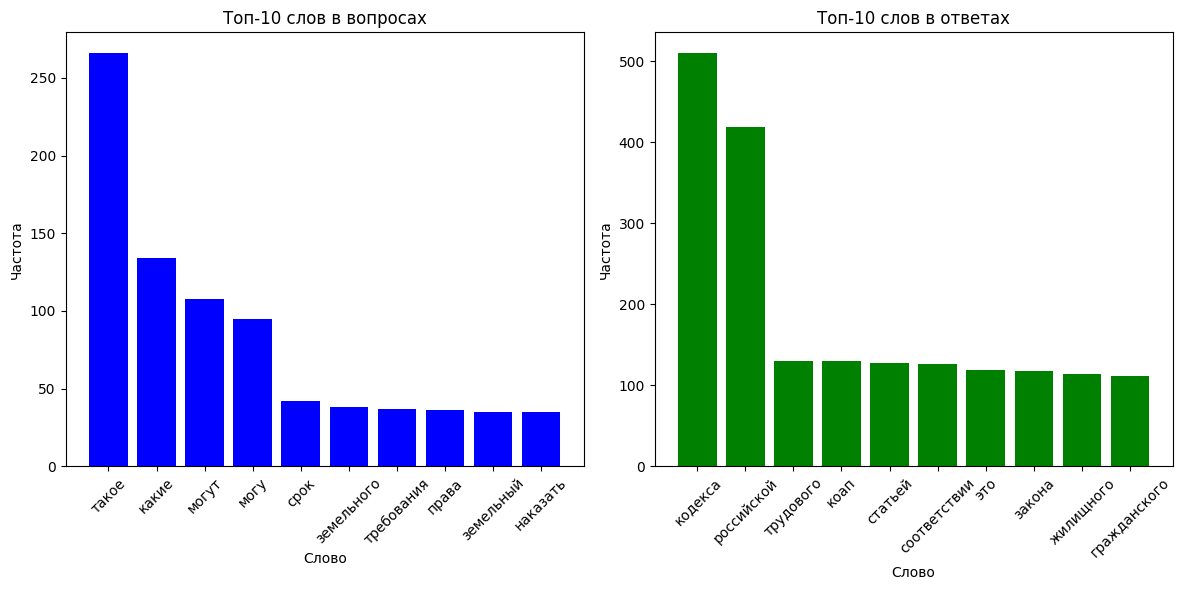

In [6]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Скачивание стоп-слов (если еще не скачаны)
nltk.download("stopwords")
stop_words = set(stopwords.words("russian"))

# Функция для подсчета частых слов
def get_top_words(text_series, top_n=10):
    words = " ".join(text_series).split()
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    word_counts = Counter(words)
    return word_counts.most_common(top_n)

# Топ-10 слов в вопросах
top_question_words = get_top_words(df["Вопрос"])
top_question_words_df = pd.DataFrame(top_question_words, columns=["Слово", "Частота"])

# Топ-10 слов в ответах
top_answer_words = get_top_words(df["Ответ"])
top_answer_words_df = pd.DataFrame(top_answer_words, columns=["Слово", "Частота"])

# Построение bar plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(top_question_words_df["Слово"], top_question_words_df["Частота"], color="blue")
plt.title("Топ-10 слов в вопросах")
plt.xlabel("Слово")
plt.ylabel("Частота")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(top_answer_words_df["Слово"], top_answer_words_df["Частота"], color="green")
plt.title("Топ-10 слов в ответах")
plt.xlabel("Слово")
plt.ylabel("Частота")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

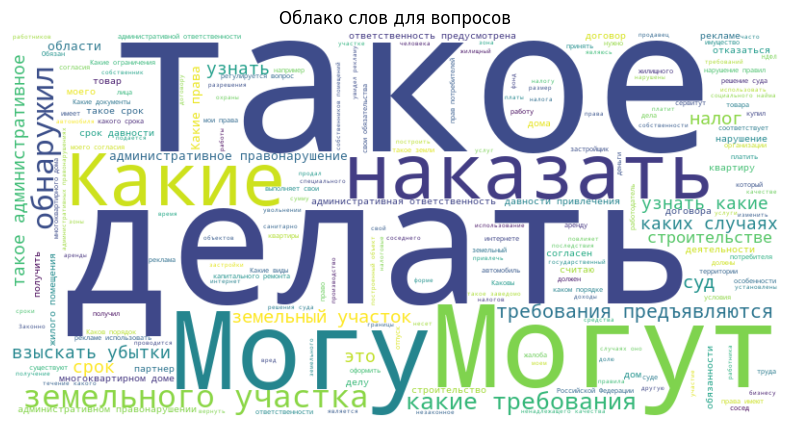

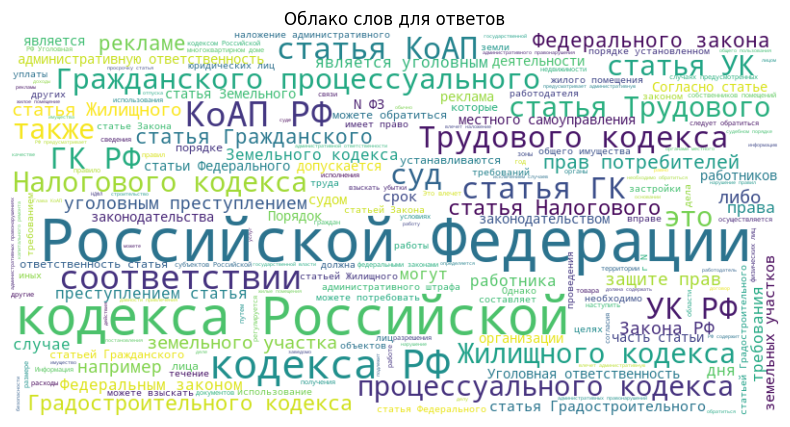

In [7]:
# Облако слов для вопросов
question_text = " ".join(df["Вопрос"])
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stop_words).generate(question_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Облако слов для вопросов")
plt.show()

# Облако слов для ответов
answer_text = " ".join(df["Ответ"])
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stop_words).generate(answer_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Облако слов для ответов")
plt.show()

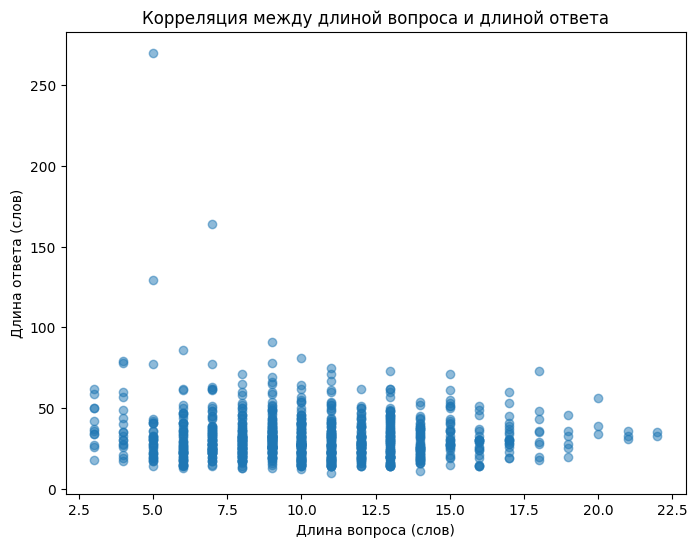

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Длина вопроса"], df["Длина ответа"], alpha=0.5)
plt.title("Корреляция между длиной вопроса и длиной ответа")
plt.xlabel("Длина вопроса (слов)")
plt.ylabel("Длина ответа (слов)")
plt.show()

In [9]:
import pandas as pd

print(df.head())
print(f"Количество примеров: {len(df)}")

                                              Вопрос  \
0  Могу ли я вернуть товар с истекшим сроком годн...   
1  Что такое налог на добычу полезных ископаемых ...   
2  Что такое государственная пошлина за регистрац...   
3  У меня есть земельный участок, какой налог я д...   
4  Что делать, если сосед сверху затапливает мою ...   

                                               Ответ  Длина вопроса  \
0  Согласно статье 18 Закона РФ "О защите прав по...              9   
1  НДПИ - это федеральный налог, который уплачива...              8   
2  Государственная пошлина взимается за государст...              8   
3  За земельный участок необходимо уплачивать зем...             12   
4  В случае затопления квартиры по вине соседа не...              8   

   Длина ответа  
0            26  
1            25  
2            17  
3            28  
4            43  
Количество примеров: 1000


In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Загрузка данных
questions = df['Вопрос'].tolist()
answers = df['Ответ'].tolist()

# Инициализация TF-IDF векторайзера
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(questions)

def baseline_predict(question):
    # Преобразование входного вопроса в TF-IDF
    question_vec = vectorizer.transform([question])
    # Вычисление косинусного сходства
    similarities = cosine_similarity(question_vec, tfidf_matrix)
    # Индекс наиболее похожего вопроса
    best_match_idx = np.argmax(similarities)
    return answers[best_match_idx]

# Тестирование baseline
test_questions = questions[:10]  # Берем первые 10 вопросов для теста
correct = 0
for i, q in enumerate(test_questions):
    pred_answer = baseline_predict(q)
    true_answer = answers[i]
    # Простая метрика: точное совпадение текста
    if pred_answer.strip() == true_answer.strip():
        correct += 1

accuracy = correct / len(test_questions)
print(f"Baseline accuracy (TF-IDF): {accuracy:.2f}")

Baseline accuracy (TF-IDF): 1.00


Распределение вопросов по темам:
Гражданский процессуальный кодекс: 231 вопросов
Гражданский кодекс РФ: 175 вопросов
Прочее: 170 вопросов
Административный кодекс: 114 вопросов
Налоговый кодекс: 83 вопросов
Закон "О защите прав потребителей": 57 вопросов
Уголовный кодекс: 44 вопросов
Федеральный закон "О рекламе": 36 вопросов
Градостроительный кодекс РФ: 28 вопросов
Земельный кодекс: 27 вопросов
Трудовой кодекс: 23 вопросов
Жилищный кодекс: 12 вопросов


C:\Users\funny\AppData\Local\Temp\ipykernel_25824\61474299.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=theme_counts.index, y=theme_counts.values, palette='viridis')


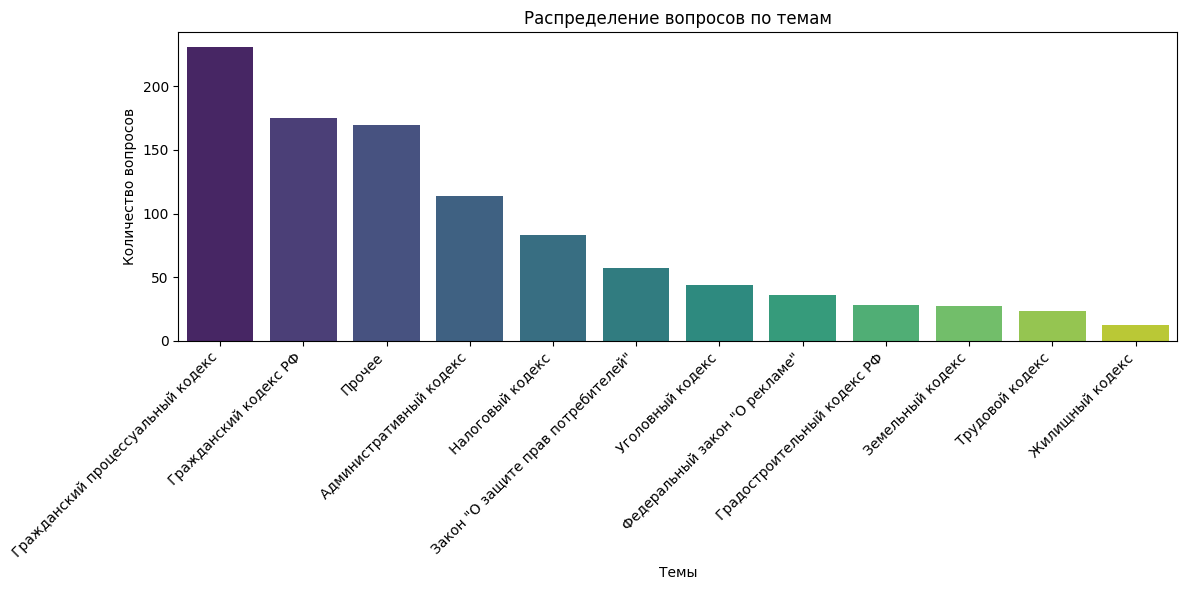

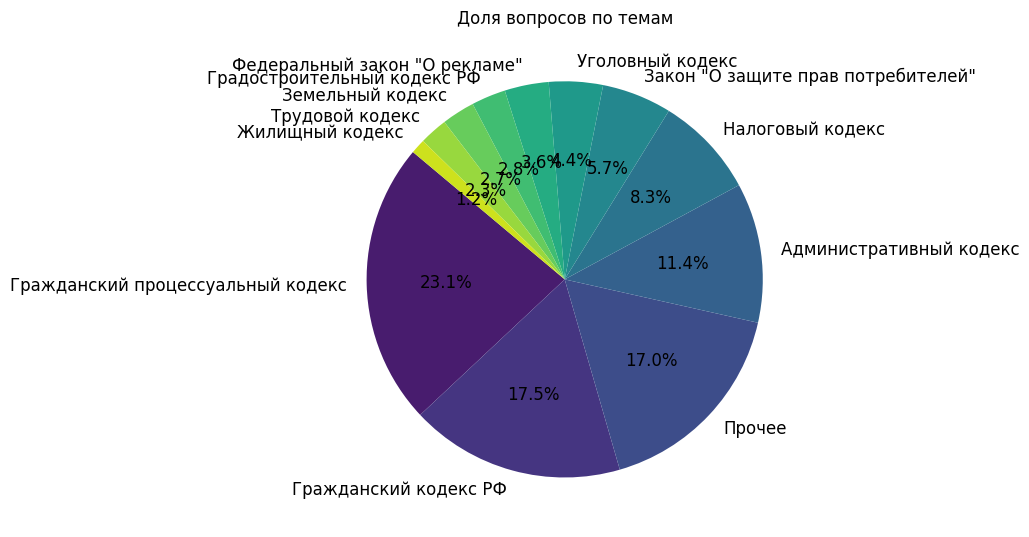

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Загрузка данных
questions = df['Вопрос'].tolist()
answers = df['Ответ'].tolist()

# Определение тем и ключевых слов
themes = {
    'Федеральный закон "О рекламе"': ['реклама', 'федеральный закон "о рекламе"', 'спонсорская реклама', 'контрреклама'],
    'Закон "О защите прав потребителей"': ['защита прав потребителей', 'потребитель', 'качество', 'возврат', 'услуга', 'товар'],
    'Гражданский кодекс РФ': ['гражданский кодекс', 'гк рф', 'договор', 'аренда', 'убытки', 'собственность'],
    'Градостроительный кодекс РФ': ['градостроительный кодекс', 'строительство', 'планировка', 'зонирование', 'парковка'],
    'Гражданский процессуальный кодекс': ['гражданский процессуальный кодекс', 'суд', 'жалоба', 'иск', 'судебный'],
    'Жилищный кодекс': ['жилищный кодекс', 'жилое помещение', 'управление домом', 'капитальный ремонт', 'выселение'],
    'Земельный кодекс': ['земельный кодекс', 'земельный участок', 'земля', 'межевание', 'сервитут'],
    'Административный кодекс': ['коап рф', 'административный', 'штраф', 'нарушение', 'арест'],
    'Налоговый кодекс': ['налоговый кодекс', 'ндфл', 'ндпи', 'налог', 'декларация'],
    'Трудовой кодекс': ['трудовой кодекс', 'работа', 'зарплата', 'отпуск', 'увольнение'],
    'Уголовный кодекс': ['ук рф', 'уголовный', 'преступление', 'кража', 'экстремизм']
}

# Функция для классификации вопроса по теме
def classify_by_theme(question, answer):
    question_lower = question.lower()
    answer_lower = answer.lower()
    for theme, keywords in themes.items():
        # Проверяем наличие ключевых слов в вопросе или ответе
        if any(keyword in question_lower or keyword in answer_lower for keyword in keywords):
            return theme
    return 'Прочее'

# Присваиваем темы
df['Theme'] = [classify_by_theme(q, a) for q, a in zip(questions, answers)]

# Подсчет количества вопросов по темам
theme_counts = df['Theme'].value_counts()

# Вывод статистики
print("Распределение вопросов по темам:")
for theme, count in theme_counts.items():
    print(f"{theme}: {count} вопросов")

# Визуализация: столбчатая диаграмма
plt.figure(figsize=(12, 6))
sns.barplot(x=theme_counts.index, y=theme_counts.values, palette='viridis')
plt.title('Распределение вопросов по темам')
plt.xlabel('Темы')
plt.ylabel('Количество вопросов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Визуализация: круговая диаграмма
plt.figure(figsize=(10, 10))
plt.pie(theme_counts.values, labels=theme_counts.index, autopct='%1.1f%%', startangle=140, 
        colors=sns.color_palette('viridis', len(theme_counts)), textprops={'fontsize': 12})
plt.title('Доля вопросов по темам')
plt.tight_layout()
plt.show()

In [30]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
import torch
import numpy as np
from sklearn.metrics import accuracy_score

# Загрузка данных
data = pd.read_csv(r"C:\Users\funny\OneDrive\Desktop\4Course_Project_HSE\Diploma\data\data.csv")
questions = data['Вопрос'].tolist()
answers = data['Ответ'].tolist()

# Загрузка модели и токенизатора
model_name = "DeepPavlov/rubert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForQuestionAnswering.from_pretrained(model_name)

# Функция для предсказания ответа
def predict_answer(question, context_list, model, tokenizer):
    best_score = -float('inf')
    best_answer = None
    
    for context in context_list:
        # Токенизация вопроса и контекста
        inputs = tokenizer(question, context, return_tensors="pt", truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        
        # Извлечение вероятностей начала и конца ответа
        answer_start_scores = outputs.start_logits
        answer_end_scores = outputs.end_logits
        
        # Находим наиболее вероятный диапазон ответа
        answer_start = torch.argmax(answer_start_scores)
        answer_end = torch.argmax(answer_end_scores) + 1
        score = answer_start_scores[0][answer_start] + answer_end_scores[0][answer_end - 1]
        
        if score > best_score:
            best_score = score
            # Декодируем ответ из токенов
            tokens = inputs["input_ids"][0][answer_start:answer_end]
            best_answer = tokenizer.decode(tokens, skip_special_tokens=True)
    
    return best_answer if best_answer else context_list[0]  # Возвращаем первый контекст, если ответ пустой

# Тестирование модели
def evaluate_model(model, tokenizer, sample_size=50):
    sample_questions = questions[:sample_size]
    sample_true_answers = answers[:sample_size]
    predicted_answers = []
    
    for q in sample_questions:
        pred = predict_answer(q, answers, model, tokenizer)  # Используем все ответы как контекст
        predicted_answers.append(pred)
    
    # Оценка точности (точное совпадение)
    accuracy = accuracy_score(
        [t.strip() for t in sample_true_answers],
        [p.strip() for p in predicted_answers]
    )
    
    print(f"Точность модели {model_name}: {accuracy:.2f}")
    return predicted_answers, accuracy

# Запуск теста
predicted_answers, model_accuracy = evaluate_model(model, tokenizer, sample_size=10)  # Ограничим для скорости

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Точность модели DeepPavlov/rubert-base-cased: 0.00


In [ ]:
themes = {
    'Федеральный закон "О рекламе"': ['реклама', 'федеральный закон "о рекламе"', 'спонсорская реклама', 'контрреклама'],
    'Закон "О защите прав потребителей"': ['защита прав потребителей', 'потребитель', 'качество', 'возврат', 'услуга', 'товар'],
    'Гражданский кодекс РФ': ['гражданский кодекс', 'гк рф', 'договор', 'аренда', 'убытки', 'собственность'],
    'Градостроительный кодекс РФ': ['градостроительный кодекс', 'строительство', 'планировка', 'зонирование', 'парковка'],
    'Гражданский процессуальный кодекс': ['гражданский процессуальный кодекс', 'суд', 'жалоба', 'иск', 'судебный'],
    'Жилищный кодекс': ['жилищный кодекс', 'жилое помещение', 'управление домом', 'капитальный ремонт', 'выселение'],
    'Земельный кодекс': ['земельный кодекс', 'земельный участок', 'земля', 'межевание', 'сервитут'],
    'Административный кодекс': ['коап рф', 'административный', 'штраф', 'нарушение', 'арест'],
    'Налоговый кодекс': ['налоговый кодекс', 'ндфл', 'ндпи', 'налог', 'декларация'],
    'Трудовой кодекс': ['трудовой кодекс', 'работа', 'зарплата', 'отпуск', 'увольнение'],
    'Уголовный кодекс': ['ук рф', 'уголовный', 'преступление', 'кража', 'экстремизм']
}

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\funny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\funny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\funny\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Тема: Федеральный закон "О рекламе"
Всего слов: 238, уникальных: 151


C:\Users\funny\AppData\Local\Temp\ipykernel_25824\1418818385.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


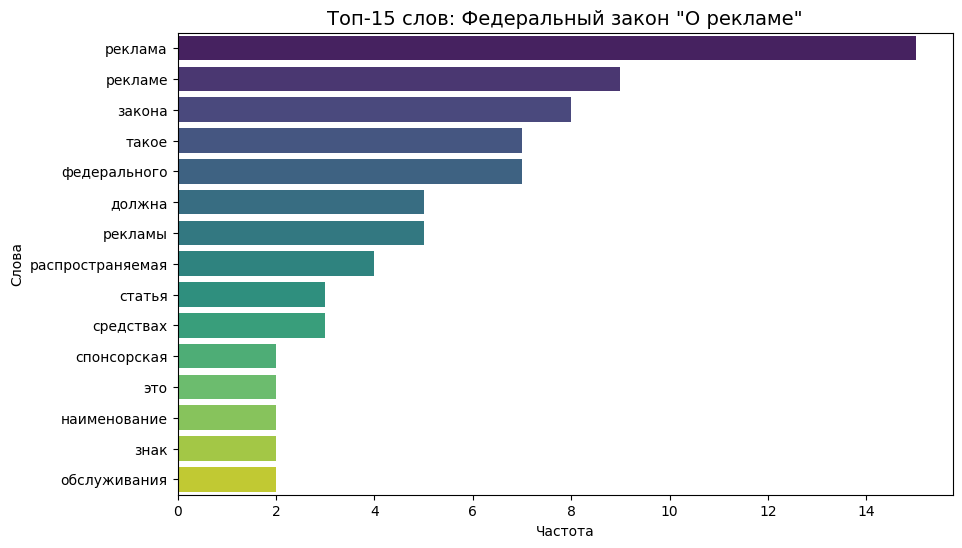


Тема: Закон "О защите прав потребителей"
Всего слов: 1558, уникальных: 639


C:\Users\funny\AppData\Local\Temp\ipykernel_25824\1418818385.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


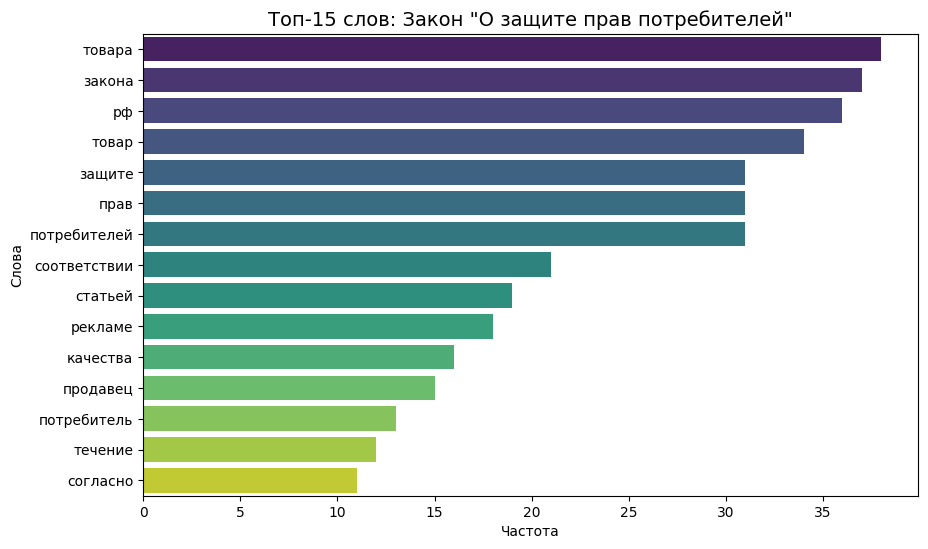


Тема: Гражданский кодекс РФ
Всего слов: 1950, уникальных: 686


C:\Users\funny\AppData\Local\Temp\ipykernel_25824\1418818385.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


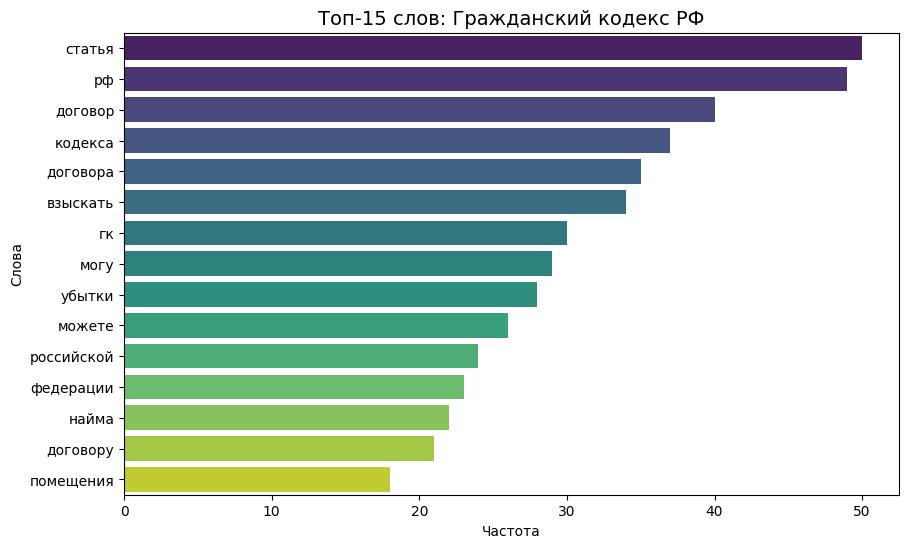


Тема: Градостроительный кодекс РФ
Всего слов: 442, уникальных: 261


C:\Users\funny\AppData\Local\Temp\ipykernel_25824\1418818385.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


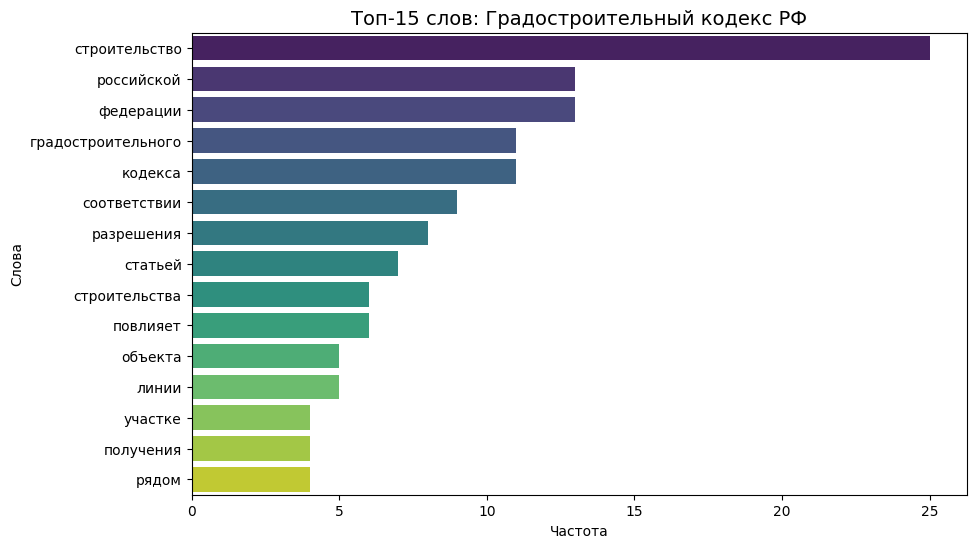


Тема: Гражданский процессуальный кодекс
Всего слов: 4406, уникальных: 1490


C:\Users\funny\AppData\Local\Temp\ipykernel_25824\1418818385.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


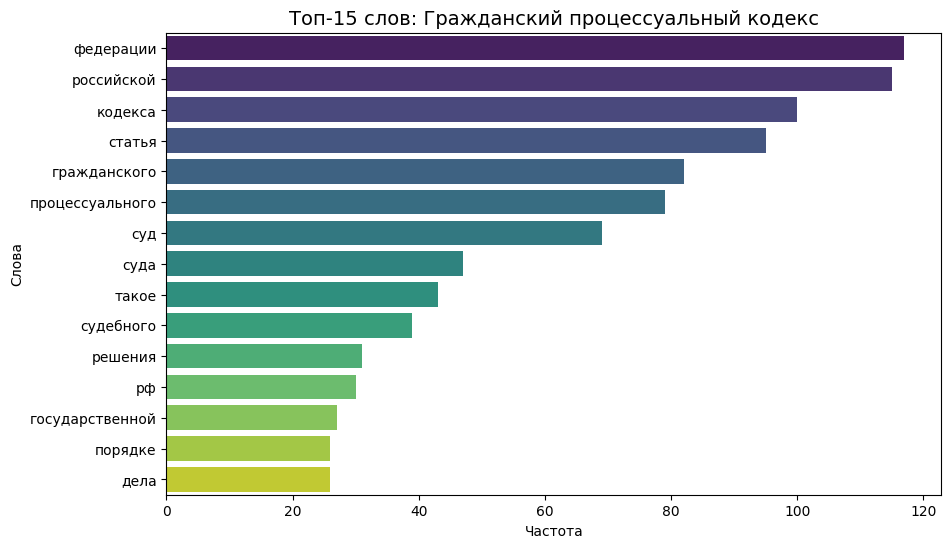


Тема: Жилищный кодекс
Всего слов: 260, уникальных: 156


C:\Users\funny\AppData\Local\Temp\ipykernel_25824\1418818385.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


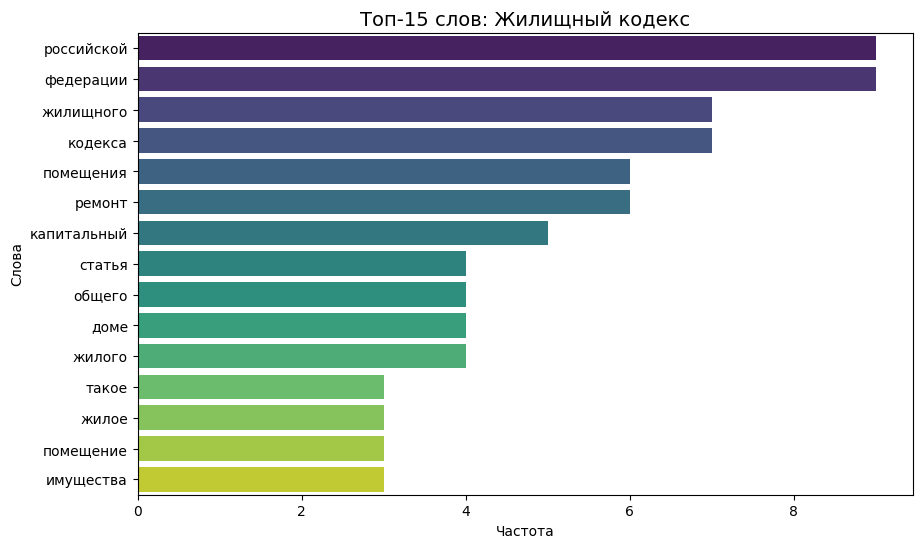


Тема: Земельный кодекс
Всего слов: 941, уникальных: 421


C:\Users\funny\AppData\Local\Temp\ipykernel_25824\1418818385.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


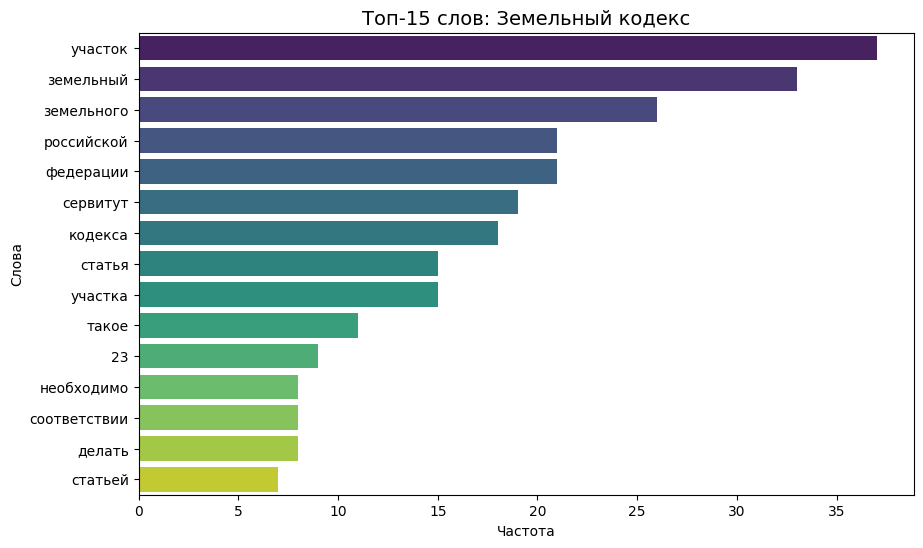


Тема: Административный кодекс
Всего слов: 1644, уникальных: 557


C:\Users\funny\AppData\Local\Temp\ipykernel_25824\1418818385.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


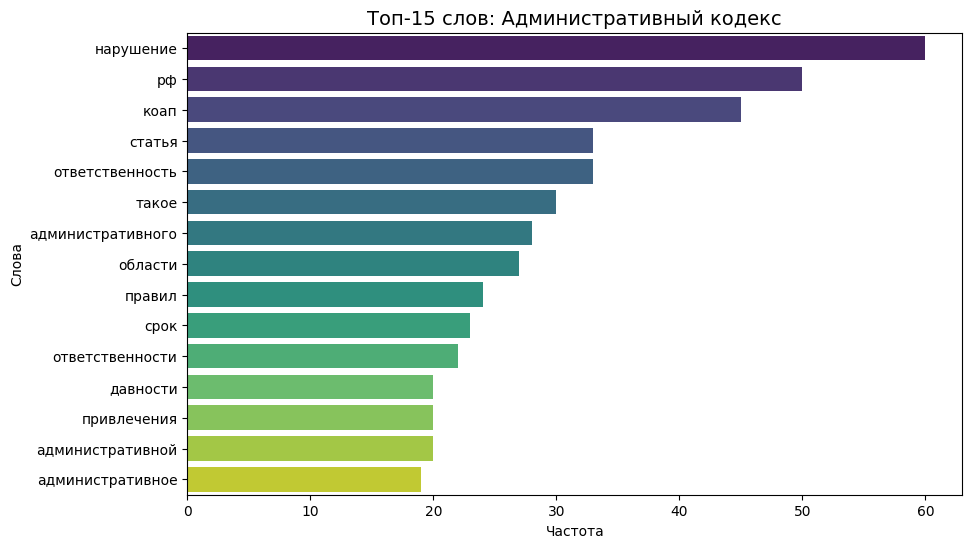

C:\Users\funny\AppData\Local\Temp\ipykernel_25824\1418818385.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')



Тема: Налоговый кодекс
Всего слов: 2498, уникальных: 1035


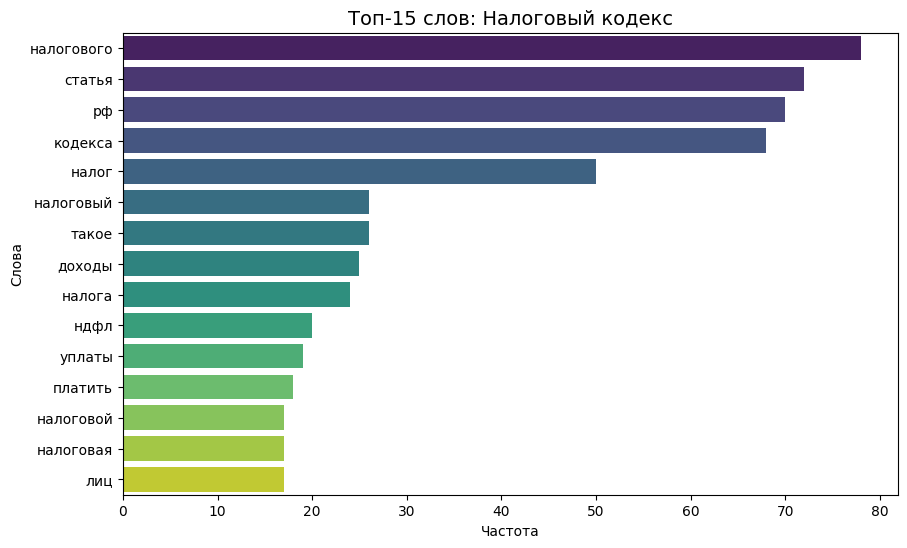


Тема: Трудовой кодекс
Всего слов: 636, уникальных: 344


C:\Users\funny\AppData\Local\Temp\ipykernel_25824\1418818385.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


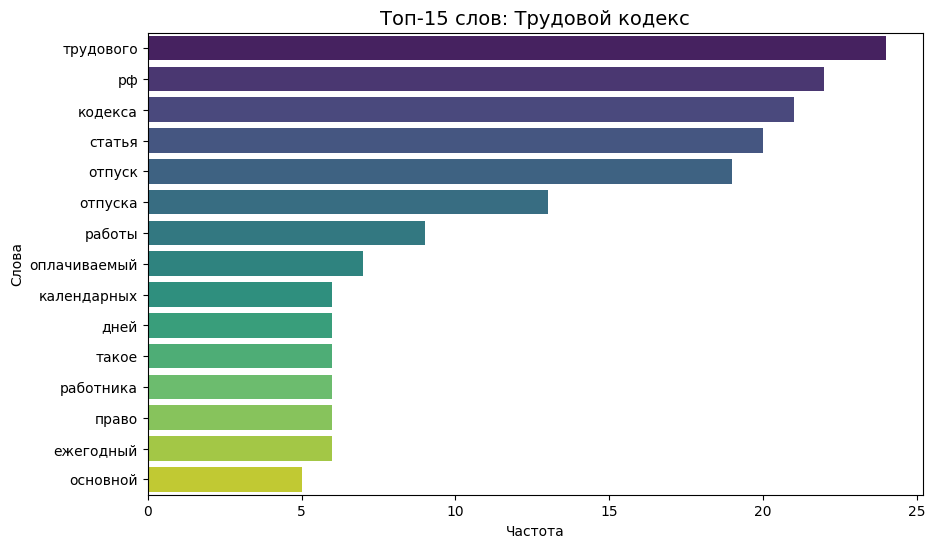

C:\Users\funny\AppData\Local\Temp\ipykernel_25824\1418818385.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')



Тема: Уголовный кодекс
Всего слов: 132, уникальных: 89


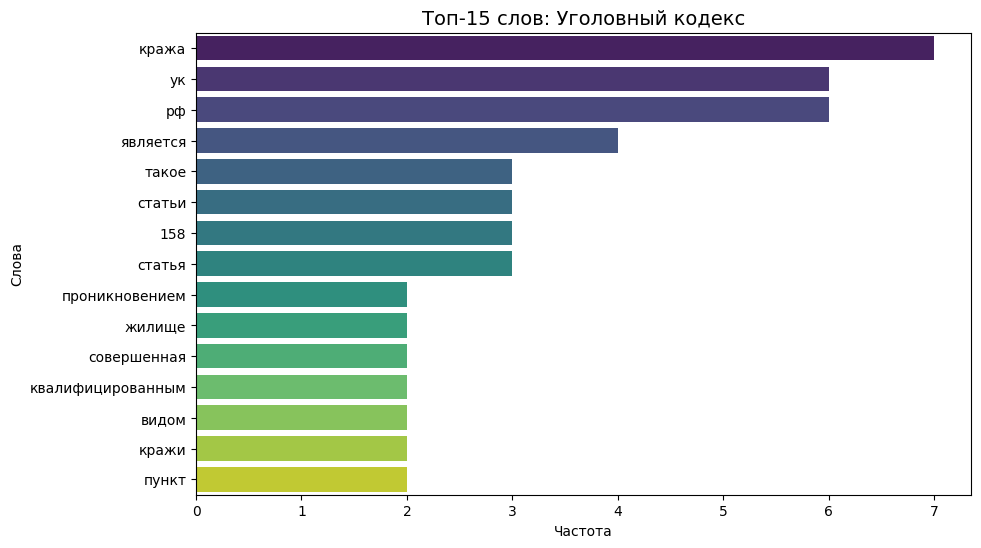

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import seaborn as sns
from collections import Counter
import nltk

# Загрузка ресурсов NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Словарь ключевых слов для каждой темы
theme_keywords = {
    'Федеральный закон "О рекламе"': ['реклама', 'федеральный закон "о рекламе"', 'спонсорская реклама', 'контрреклама'],
    'Закон "О защите прав потребителей"': ['защита прав потребителей', 'потребитель', 'качество', 'возврат', 'услуга', 'товар'],
    'Гражданский кодекс РФ': ['гражданский кодекс', 'гк рф', 'договор', 'аренда', 'убытки', 'собственность'],
    'Градостроительный кодекс РФ': ['градостроительный кодекс', 'строительство', 'планировка', 'зонирование', 'парковка'],
    'Гражданский процессуальный кодекс': ['гражданский процессуальный кодекс', 'суд', 'жалоба', 'иск', 'судебный'],
    'Жилищный кодекс': ['жилищный кодекс', 'жилое помещение', 'управление домом', 'капитальный ремонт', 'выселение'],
    'Земельный кодекс': ['земельный кодекс', 'земельный участок', 'земля', 'межевание', 'сервитут'],
    'Административный кодекс': ['коап рф', 'административный', 'штраф', 'нарушение', 'арест'],
    'Налоговый кодекс': ['налоговый кодекс', 'ндфл', 'ндпи', 'налог', 'декларация'],
    'Трудовой кодекс': ['трудовой кодекс', 'работа', 'зарплата', 'отпуск', 'увольнение'],
    'Уголовный кодекс': ['ук рф', 'уголовный', 'преступление', 'кража', 'экстремизм']
}

# Функция для определения темы вопроса
def detect_theme(text):
    if not isinstance(text, str):
        return "Другое"
    text = text.lower()
    for theme, keywords in theme_keywords.items():
        if any(keyword in text for keyword in keywords):
            return theme
    return "Другое"

# Применяем классификатор к каждому вопросу
df['Тема'] = df['Вопрос'].apply(detect_theme)

# Предварительная обработка текста (токенизация, лемматизация)
def preprocess_text(text):
    if not isinstance(text, str):
        return []
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('russian'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Собираем слова по темам
themes_words = {theme: [] for theme in theme_keywords}
for _, row in df.iterrows():
    theme = row['Тема']
    if theme != "Другое":
        themes_words[theme].extend(preprocess_text(row['Вопрос']))
        themes_words[theme].extend(preprocess_text(row['Ответ']))

# Визуализация
def plot_top_words(words, title, top_n=15):
    word_counts = Counter(words)
    top_words = word_counts.most_common(top_n)
    words = [word[0] for word in top_words]
    counts = [word[1] for word in top_words]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=words, palette='viridis')
    plt.title(f'Топ-{top_n} слов: {title}', fontsize=14)
    plt.xlabel('Частота')
    plt.ylabel('Слова')
    plt.show()

# Вывод результатов для каждой темы
for theme, words in themes_words.items():
    if words:
        print(f"\nТема: {theme}")
        print(f"Всего слов: {len(words)}, уникальных: {len(set(words))}")
        plot_top_words(words, theme, 15)